<a href="https://colab.research.google.com/github/shinbad/small_project/blob/main/AI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 데이터셋 파일이 있는 경로로 이동
%cd /content/drive/MyDrive/ColabNotebooks/AI

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ColabNotebooks/AI


In [ ]:
# matplotlib 한글 깨짐 현상 해결을 위한 폰트 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,212 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 124947 files and dire

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("keras_dataset.csv")
df.head()

,작성년월,작성경찰서명,발생건수전체,피해자성별남성,피해자성별여성,피해자성별불상,피해자연령6이하,피해자연령12이하,피해자연령15이하,피해자연령20이하,...,수사단서정보변사체,수사단서정보현행범,수사단서정보기타,발생요일일요일,발생요일월요일,발생요일화요일,발생요일수요일,발생요일목요일,발생요일금요일,발생요일토요일
0,2011,서울강남경찰서,21313.0,11875.0,4990.0,4448.0,1.0,19.0,30.0,277.0,...,5.0,2834.0,956.0,1878.0,2973.0,3455.0,3297.0,3408.0,3594.0,2708.0
1,2011,서울강동경찰서,13093.0,7087.0,3302.0,2704.0,14.0,47.0,131.0,392.0,...,3.0,2440.0,632.0,1612.0,1886.0,1932.0,1925.0,1964.0,2005.0,1769.0
2,2011,서울강북경찰서,11044.0,5906.0,2675.0,2463.0,1.0,37.0,81.0,355.0,...,4.0,2815.0,637.0,1464.0,1584.0,1596.0,1571.0,1571.0,1671.0,1587.0
3,2011,서울강서경찰서,17711.0,9550.0,4050.0,4111.0,15.0,48.0,109.0,547.0,...,4.0,2282.0,1798.0,1932.0,2603.0,2608.0,2714.0,2711.0,2820.0,2323.0
4,2011,서울관악경찰서,15489.0,8568.0,4191.0,2730.0,17.0,39.0,103.0,520.0,...,2.0,2895.0,637.0,1815.0,2242.0,2496.0,2136.0,2262.0,2387.0,2151.0


#데이터 분석

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   작성년월         282 non-null    int64  
 1   작성경찰서명       282 non-null    object 
 2   발생건수전체       282 non-null    float64
 3   피해자성별남성      282 non-null    float64
 4   피해자성별여성      282 non-null    float64
 5   피해자성별불상      282 non-null    float64
 6   피해자연령6이하     282 non-null    float64
 7   피해자연령12이하    282 non-null    float64
 8   피해자연령15이하    282 non-null    float64
 9   피해자연령20이하    282 non-null    float64
 10  피해자연령30이하    282 non-null    float64
 11  피해자연령40이하    282 non-null    float64
 12  피해자연령50이하    282 non-null    float64
 13  피해자연령60이하    282 non-null    float64
 14  피해자연령60초과    282 non-null    float64
 15  피해자연령건수      282 non-null    float64
 16  범죄유형강력       282 non-null    float64
 17  범죄유형폭력       282 non-null    float64
 18  범죄유형절도       282 non-null    float64
 19  범죄유형지능  

In [ ]:
df['작성경찰서명'].unique()

array(['서울강남경찰서', '서울강동경찰서', '서울강북경찰서', '서울강서경찰서', '서울관악경찰서', '서울광진경찰서',
       '서울구로경찰서', '서울금천경찰서', '서울남대문경찰서', '서울노원경찰서', '서울도봉경찰서', '서울동대문경찰서',
       '서울동작경찰서', '서울마포경찰서', '서울방배경찰서', '서울서대문경찰서', '서울서부경찰서', '서울서초경찰서',
       '서울성동경찰서', '서울성북경찰서', '서울송파경찰서', '서울수서경찰서', '서울양천경찰서', '서울영등포경찰서',
       '서울용산경찰서', '서울은평경찰서', '서울종로경찰서', '서울종암경찰서', '서울중랑경찰서', '서울중부경찰서',
       '서울지방경찰청', '서울혜화경찰서'], dtype=object)

In [ ]:
len(df['작성경찰서명'].unique())

32

In [ ]:
crime_type = ['범죄유형강력', '범죄유형폭력', '범죄유형절도', '범죄유형지능', '범죄유형기타']
df[crime_type].sum()

,0
범죄유형강력,59789.0
범죄유형폭력,573239.0
범죄유형절도,460302.0
범죄유형지능,664986.0
범죄유형기타,1318301.0


In [ ]:
year_crimes = df.groupby('작성년월').sum()[crime_type]

In [ ]:
year_crimes

,범죄유형강력,범죄유형폭력,범죄유형절도,범죄유형지능,범죄유형기타
작성년월,,,,,
2011,6911.0,72020.0,54273.0,71269.0,153994.0
2012,6020.0,70514.0,61074.0,72140.0,147971.0
2013,6275.0,65421.0,61425.0,76500.0,158648.0
2014,6270.0,65313.0,59294.0,72275.0,152571.0
2015,6193.0,65232.0,55215.0,73268.0,156405.0
2016,6676.0,64592.0,46742.0,72410.0,152338.0
2017,7484.0,59392.0,41087.0,70712.0,141200.0
2018,6975.0,56028.0,39069.0,75747.0,130685.0
2019,6985.0,54727.0,42123.0,80665.0,124489.0


In [ ]:
year_crimes.sum(axis=1)

,0
작성년월,
2011,358467.0
2012,357719.0
2013,368269.0
2014,355723.0
2015,356313.0
2016,342758.0
2017,319875.0
2018,308504.0
2019,308989.0


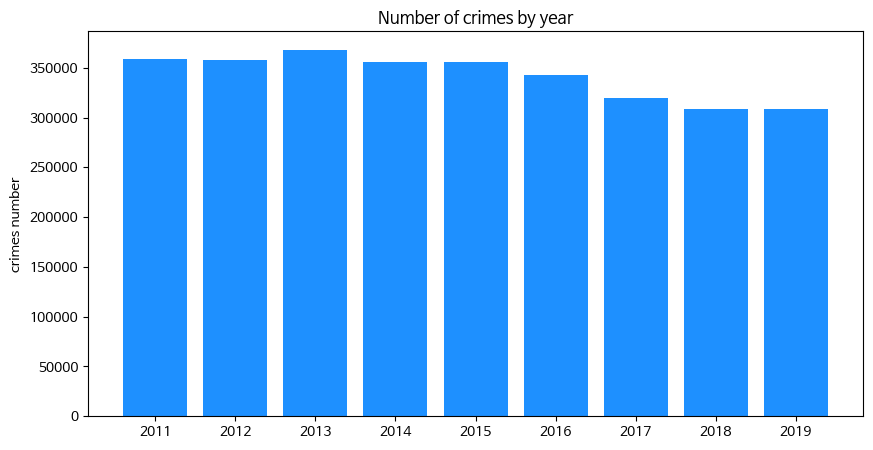

In [ ]:
import matplotlib.pyplot as plt

years = list(df['작성년월'].unique())

plt.figure(figsize=(10,5))
plt.bar(range(len(years)), year_crimes.sum(axis=1), color='dodgerblue')

plt.title("Number of crimes by year")          #차트 제목
plt.ylabel('crimes number')                #y축 라벨

plt.xticks(range(len(years)), years) #x축에 틱을 붙임.
plt.show()

In [ ]:
import matplotlib.font_manager as fm
fm.fontManager.ttflist
[f.name for f in fm.fontManager.ttflist]

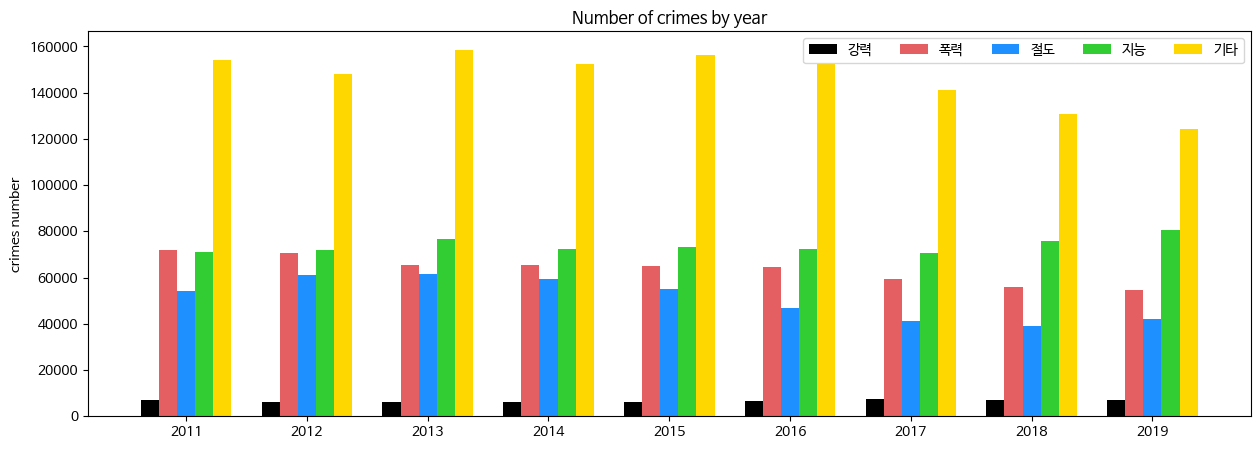

In [ ]:
import seaborn as sns
idx = np.arange(len(years))
w = 0.15
crimes = [
    ('범죄유형강력', '강력', -2),
    ('범죄유형폭력', '폭력', -1),
    ('범죄유형절도', '절도',  0),
    ('범죄유형지능', '지능',  1),
    ('범죄유형기타', '기타', 2)
]
colors = ['k', '#e35f62', 'dodgerblue', 'limegreen', 'gold']
i=0

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15,5))
for key, label, offset in crimes:
  plt.bar(idx + offset * w, year_crimes[key], width=w, label=label, color=colors[i])
  i+=1

plt.title("Number of crimes by year")          #차트 제목
plt.ylabel('crimes number')                #y축 라벨

plt.xticks(idx, years) #x축에 틱을 붙임.
plt.legend(ncol = 5)
plt.show()

In [ ]:
gender_crimes = df[['피해자성별남성','피해자성별여성']].sum()

In [ ]:
gender_crimes

,0
피해자성별남성,1536763.0
피해자성별여성,824603.0


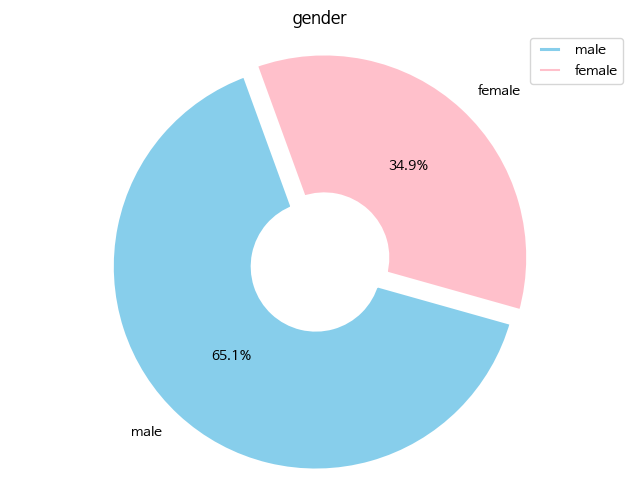

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))

ax.pie(gender_crimes,labels=['male', 'female'], autopct='%1.1f%%',startangle=110, labeldistance=1.1, colors=['skyblue', 'pink'], explode = [0.03, 0.03],  wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
ax.axis('equal')

plt.title('gender')
plt.legend()
plt.show()

# 데이터 정제

In [ ]:
df.isnull().sum()

,0
작성년월,0
작성경찰서명,0
발생건수전체,0
피해자성별남성,0
피해자성별여성,0
피해자성별불상,0
피해자연령6이하,0
피해자연령12이하,0
피해자연령15이하,0
피해자연령20이하,0


In [ ]:
df[df.duplicated()]

,작성년월,작성경찰서명,발생건수전체,피해자성별남성,피해자성별여성,피해자성별불상,피해자연령6이하,피해자연령12이하,피해자연령15이하,피해자연령20이하,...,수사단서정보변사체,수사단서정보현행범,수사단서정보기타,발생요일일요일,발생요일월요일,발생요일화요일,발생요일수요일,발생요일목요일,발생요일금요일,발생요일토요일


# 23개 커럼 사용
| 작성년월 | 작성경찰서명 | 발생건수전체 |
| --- | --- | --- |
| 피해자성별남성 | 피해자성별여성 | 피해자성별불상 |
| 피해자연령6이하 | 피해자연령12이하 | 피해자연령15이하 |
| 피해자연령20이하 | 피해자연령30이하 | 피해자연령40이하 |
| 피해자연령50이하 | 피해자연령60이하 | 피해자연령60초과 |
| 피해자연령건수 | 발생요일일요일 | 발생요일월요일 |
| 발생요일화요일 | 발생요일수요일 | 발생요일목요일 |
| 발생요일금요일 | 발생요일토요일 |  |

In [ ]:
#필요 라이브러리 호출
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
import pandas as pd
from sklearn import preprocessing

#데이터 전처리
def Data_func():
  train = pd.read_csv("keras_dataset_remaster.csv") #칼럼 정리와 결측값과 중복값 제거된 데이터셋
  le2=LabelEncoder()
  data = train.drop('작성경찰서명', axis=1).values
  target = le2.fit_transform(train['작성경찰서명'].values)  # Label Encoding
  X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, stratify=target, random_state=2018)

  #MinMaxScaler 함수를 통한 데이터셋 정규화
  scaler = preprocessing.MinMaxScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  return (X_train, y_train),(X_test, y_test)

In [ ]:
#필요 라이브러리 호출
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
import math
import tensorflow as tf
(X_train, Y_train), (X_test, Y_test) = Data_func()

# RandomForest 모델로 학습
# 하이퍼파라미터 튜닝 전
rf_test = RandomForestClassifier(random_state=2, n_jobs=-1)
rf_test.fit(X_train, Y_train)

# train 데이터의 정확도
train_score=rf_test.score(X_train, Y_train)
print('Train_Score : {}'.format(train_score))

# test 데이터의 정확도
test_score=rf_test.score(X_test, Y_test)
print('Test_Score : {}'.format(test_score))

Train_Score : 1.0
Test_Score : 0.6338028169014085


## 하이퍼파라미터
- max_depth: 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요
- max_features: 최적의 분할을 위해 고려할 최대 feature 개수
- min_samples_split: 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가
- n_estimators: 결정 트리의 개수를 지정: 개수를 늘리면 성능이 좋아지는 것에 비해 시간이 걸린다.


In [ ]:
# RandomForest 모델로 학습
# 하이퍼파라미터 튜닝 전
rf_run = RandomForestClassifier(random_state=2, max_depth= 5, max_features = 30, min_samples_split=17, n_estimators=120, n_jobs=-1)
rf_run.fit(X_train, Y_train)

# train 데이터의 정확도, log_loss
train_score=rf_run.score(X_train, Y_train)
print('Train_Score : {}'.format(train_score))

train_predict = rf_run.predict_proba(X_train)
print("log_loss':{}".format(log_loss(Y_train, train_predict)))

# test 데이터의 정확도, log_loss
test_score=rf_run.score(X_test, Y_test)
print('Test_Score : {}'.format(test_score))

y_predict = rf_run.predict_proba(X_test)
print("log_loss':{}".format(log_loss(Y_test, y_predict)))

Train_Score : 0.8436018957345972
log_loss':1.5125798472965652
Test_Score : 0.6338028169014085
log_loss':1.8902288264298452


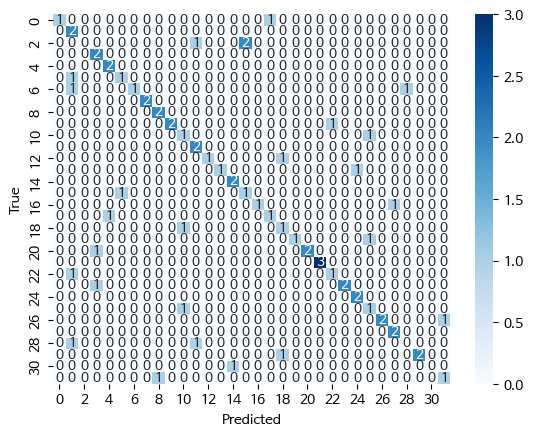

In [ ]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pre = rf_run.predict(X_test)
cm = confusion_matrix(Y_test, y_pre)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')

plt.ylabel('True')
plt.show()

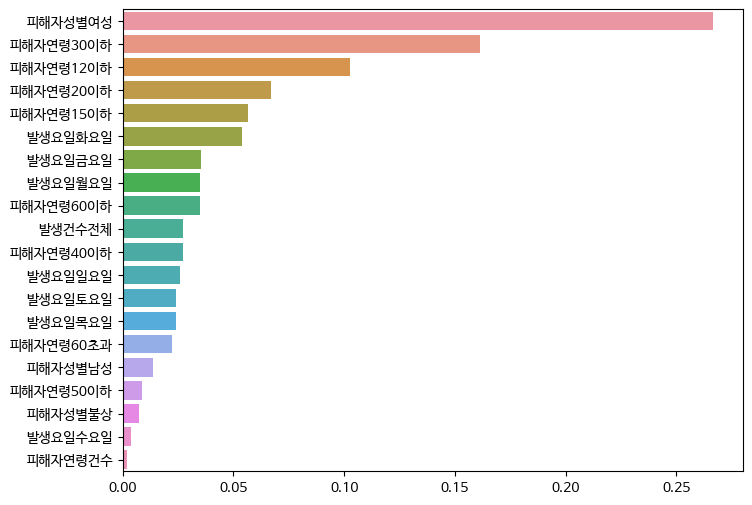

In [ ]:
# 득점모델 변수 중요도
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv("keras_dataset_remaster.csv") #칼럼 정리와 결측값과 중복값 제거된 데이터셋
data = train.drop('작성경찰서명', axis=1).copy() #지역 예측(출력값)을 위한 colum 분리

ftr_importances_values = rf_run.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=data.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.rc('font', family='NanumBarunGothic')
plt.show()

# 전체 컬럼 학습

In [ ]:
#필요 라이브러리 호출
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
import pandas as pd
from sklearn import preprocessing

#데이터 전처리
def Data_func():
  train = df
  le2=LabelEncoder()
  data = train.drop('작성경찰서명', axis=1).values
  target = le2.fit_transform(train['작성경찰서명'].values)  # Label Encoding

  X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, stratify=target, random_state=2018)
  #데이터셋 Train, Test 7.5:2.5 비율로 분리 -> 32개의 지역이 다 나오기 위해

  #MinMaxScaler 함수를 통한 데이터셋 정규화
  scaler = preprocessing.MinMaxScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  return (X_train, y_train),(X_test, y_test), le2.classes_

In [ ]:
#필요 라이브러리 호출
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import math
import tensorflow as tf

(X_train, Y_train), (X_test, Y_test), label_classes = Data_func()

# RandomForest 모델로 학습
# 하이퍼파라미터 튜닝 전
rf_test = RandomForestClassifier(random_state=2, n_jobs=-1)
rf_test.fit(X_train, Y_train)

# train 데이터의 정확도
train_score=rf_test.score(X_train, Y_train)
print('Train_Score : {}'.format(train_score))

# test 데이터의 정확도
test_score=rf_test.score(X_test, Y_test)
print('Test_Score : {}'.format(test_score))

Train_Score : 1.0
Test_Score : 0.8450704225352113


## 하이퍼파라미터
- max_depth: 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요
- max_features: 최적의 분할을 위해 고려할 최대 feature 개수
- min_samples_split: 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가
- n_estimators: 결정 트리의 개수를 지정: 개수를 늘리면 성능이 좋아지는 것에 비해 시간이 걸린다.


In [ ]:
# RandomForest 모델로 학습
# 하이퍼파라미터 튜닝 전
rf_run = RandomForestClassifier(random_state=2, max_depth= 5, max_features = 30, min_samples_split=17, n_estimators=120, n_jobs=-1)
rf_run.fit(X_train, Y_train)

# train 데이터의 정확도, log_loss
train_score=rf_run.score(X_train, Y_train)
print('Train_Score : {}'.format(train_score))


# test 데이터의 정확도, log_loss
test_score=rf_run.score(X_test, Y_test)
print('Test_Score : {}'.format(test_score))

Train_Score : 0.933649289099526
Test_Score : 0.676056338028169


In [ ]:
label_classes

array(['서울강남경찰서', '서울강동경찰서', '서울강북경찰서', '서울강서경찰서', '서울관악경찰서', '서울광진경찰서',
       '서울구로경찰서', '서울금천경찰서', '서울남대문경찰서', '서울노원경찰서', '서울도봉경찰서', '서울동대문경찰서',
       '서울동작경찰서', '서울마포경찰서', '서울방배경찰서', '서울서대문경찰서', '서울서부경찰서', '서울서초경찰서',
       '서울성동경찰서', '서울성북경찰서', '서울송파경찰서', '서울수서경찰서', '서울양천경찰서', '서울영등포경찰서',
       '서울용산경찰서', '서울은평경찰서', '서울종로경찰서', '서울종암경찰서', '서울중랑경찰서', '서울중부경찰서',
       '서울지방경찰청', '서울혜화경찰서'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report
pred1 = rf_run.predict(X_test)
print(classification_report(Y_test, pred1, zero_division=1.0, target_names=label_classes))

              precision    recall  f1-score   support

     서울강남경찰서       1.00      1.00      1.00         2
     서울강동경찰서       0.22      1.00      0.36         2
     서울강북경찰서       1.00      0.33      0.50         3
     서울강서경찰서       1.00      1.00      1.00         2
     서울관악경찰서       1.00      1.00      1.00         2
     서울광진경찰서       0.33      0.50      0.40         2
     서울구로경찰서       1.00      0.33      0.50         3
     서울금천경찰서       0.67      1.00      0.80         2
    서울남대문경찰서       0.67      1.00      0.80         2
     서울노원경찰서       1.00      0.00      0.00         3
     서울도봉경찰서       0.40      1.00      0.57         2
    서울동대문경찰서       1.00      1.00      1.00         2
     서울동작경찰서       1.00      0.00      0.00         2
     서울마포경찰서       1.00      0.50      0.67         2
     서울방배경찰서       0.67      1.00      0.80         2
    서울서대문경찰서       0.25      0.50      0.33         2
     서울서부경찰서       1.00      1.00      1.00         2
     서울서초경찰서       1.00    

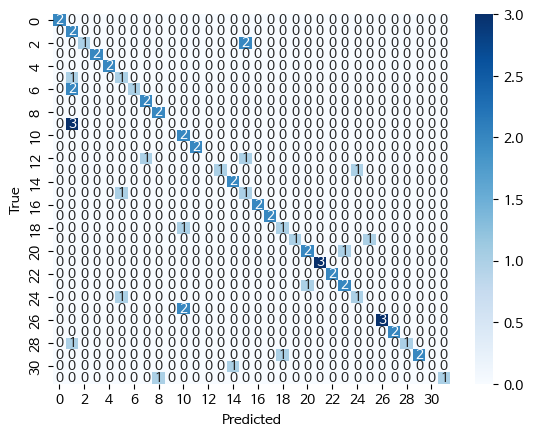

In [ ]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pre = rf_run.predict(X_test)
cm = confusion_matrix(Y_test, y_pre)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')

plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [10, 30, 50],  # 범위값을 지정
    'min_samples_split': [5, 7, 20]
          }

# 객체 생성
rf3 = RandomForestClassifier(random_state=10)

# 최적의 하이퍼 파라미터를 찾는 객체 생성
grid_df = GridSearchCV(rf3, params, cv=2)  # cv: 데이터 교차검증 수

# 학습
grid_df.fit(X_train, Y_train)

# best_params_: 최적의 성능을 만들 하이퍼 파라미터를 알려줌(params로 설정해놓은 범위 내에서)
print(f'best params: {grid_df.best_params_ }')
print(f'best score: {grid_df.best_score_ }')

best params: {'max_depth': 30, 'min_samples_split': 5}
best score: 0.7063342318059299


In [ ]:
# 최적의 하이퍼 파라미터 적용
rf3 = RandomForestClassifier(min_samples_split=5, max_depth=30, random_state=10)
rf3.fit(X_train, Y_train)

train_score=rf3.score(X_train, Y_train)
print('Train_Score : {}'.format(train_score))

test_score=rf3.score(X_test, Y_test)
print('Test_Score : {}'.format(test_score))

Train_Score : 1.0
Test_Score : 0.8591549295774648


In [ ]:
pred2 = rf3.predict(X_test)
print(classification_report(Y_test, pred2, zero_division=1.0, target_names=label_classes))

              precision    recall  f1-score   support

     서울강남경찰서       1.00      1.00      1.00         2
     서울강동경찰서       0.50      1.00      0.67         2
     서울강북경찰서       1.00      0.67      0.80         3
     서울강서경찰서       1.00      1.00      1.00         2
     서울관악경찰서       1.00      1.00      1.00         2
     서울광진경찰서       1.00      1.00      1.00         2
     서울구로경찰서       1.00      1.00      1.00         3
     서울금천경찰서       1.00      1.00      1.00         2
    서울남대문경찰서       0.67      1.00      0.80         2
     서울노원경찰서       1.00      0.67      0.80         3
     서울도봉경찰서       0.50      1.00      0.67         2
    서울동대문경찰서       1.00      1.00      1.00         2
     서울동작경찰서       1.00      0.50      0.67         2
     서울마포경찰서       1.00      0.50      0.67         2
     서울방배경찰서       1.00      1.00      1.00         2
    서울서대문경찰서       0.67      1.00      0.80         2
     서울서부경찰서       1.00      1.00      1.00         2
     서울서초경찰서       1.00    

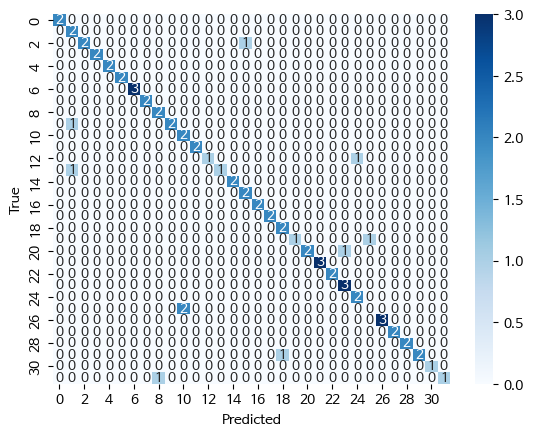

In [ ]:
y_pre = rf3.predict(X_test)
cm = confusion_matrix(Y_test, y_pre)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')

plt.ylabel('True')
plt.show()

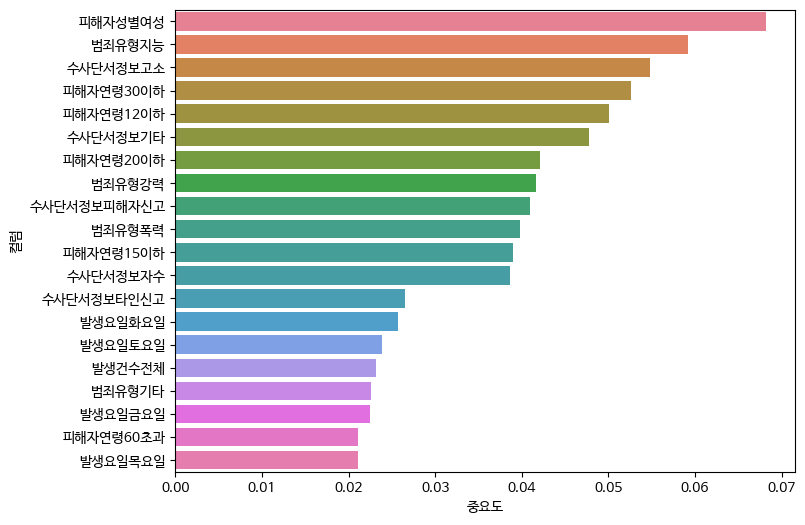

In [ ]:
# 득점모델 변수 중요도
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv("keras_dataset.csv") #칼럼 정리와 결측값과 중복값 제거된 데이터셋
data = train.drop('작성경찰서명', axis=1).copy() #지역 예측(출력값)을 위한 colum 분리

ftr_importances_values = rf3.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=data.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
colors = sns.color_palette('hls',20)
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index, hue=colors, legend=False)
plt.xlabel('중요도')
plt.ylabel('컬럼')
plt.rc('font', family='NanumBarunGothic')
plt.show()